### Download dataset

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import torch

from IPython.display import Image, clear_output  # to display images

In [2]:
import os
project_dir = os.path.dirname(os.getcwd())
yolo_location = os.path.join(project_dir, 'yolov5')
dataset_location = os.path.join(project_dir, 'data', 'roboflow_dataset')
data_yaml_location = os.path.join(dataset_location, 'data.yaml')

In [3]:
import yaml

with open (data_yaml_location, 'r') as file:
    data = yaml.safe_load(file)

data['train'] = f'{dataset_location}/train/images'
data['val'] = f'{dataset_location}/valid/images'
data['test'] = f'{dataset_location}/test/images'

with open(data_yaml_location, 'w') as file:
    yaml.dump(data, file)

In [4]:
train_version = "1"

if train_version == "1":
    train_version = ""

In [5]:
dataset_location

'/home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset'

In [6]:
yolo_location

'/home/roma/5sem/Real-time_Number_Plate_Recognition/yolov5'

### Training the model

In [7]:
%%time
%cd {yolo_location}
!python train.py --img 416 --batch 16 --epochs 10 --data {data_yaml_location} --cfg ./models/yolov5s_custom.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache
     

/home/roma/5sem/Real-time_Number_Plate_Recognition/yolov5


/home/roma/5sem/Real-time_Number_Plate_Recognition/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


train: weights=yolov5s.pt, cfg=./models/yolov5s_custom.yaml, data=/home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-377-g24ee2801 Python-3.12.7 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5834MiB)

hyperparameters: lr0=0.01, lrf=0.01

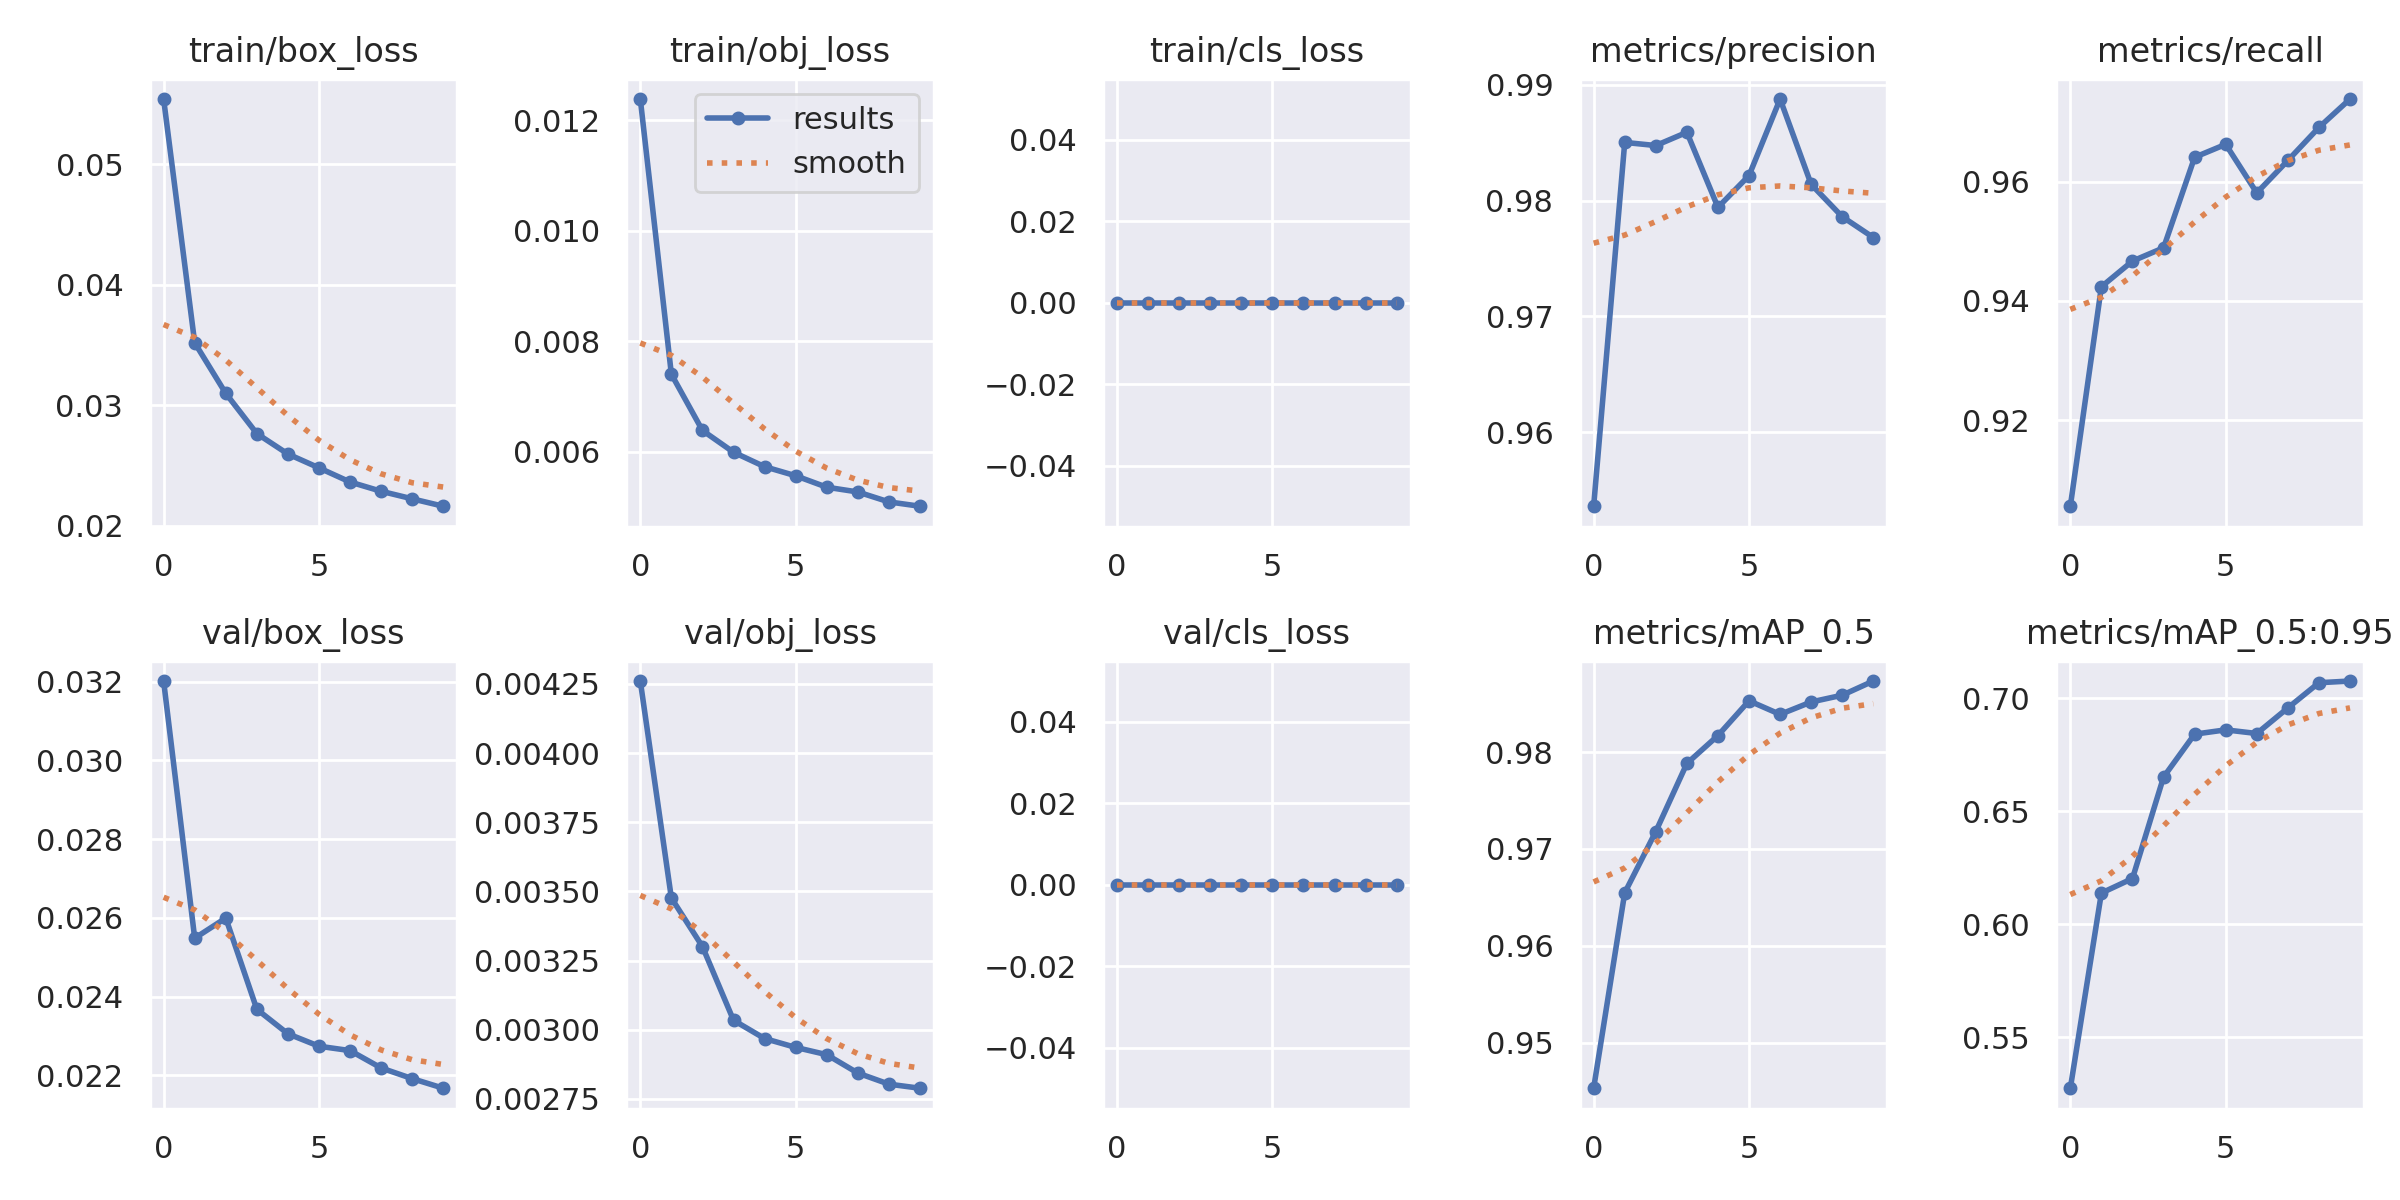

In [ ]:

from utils.plots import plot_results  # plot results.txt as results.png
Image(filename=f'./runs/train/yolov5s_results{train_version}/results.png', width=1000)  # view results.png

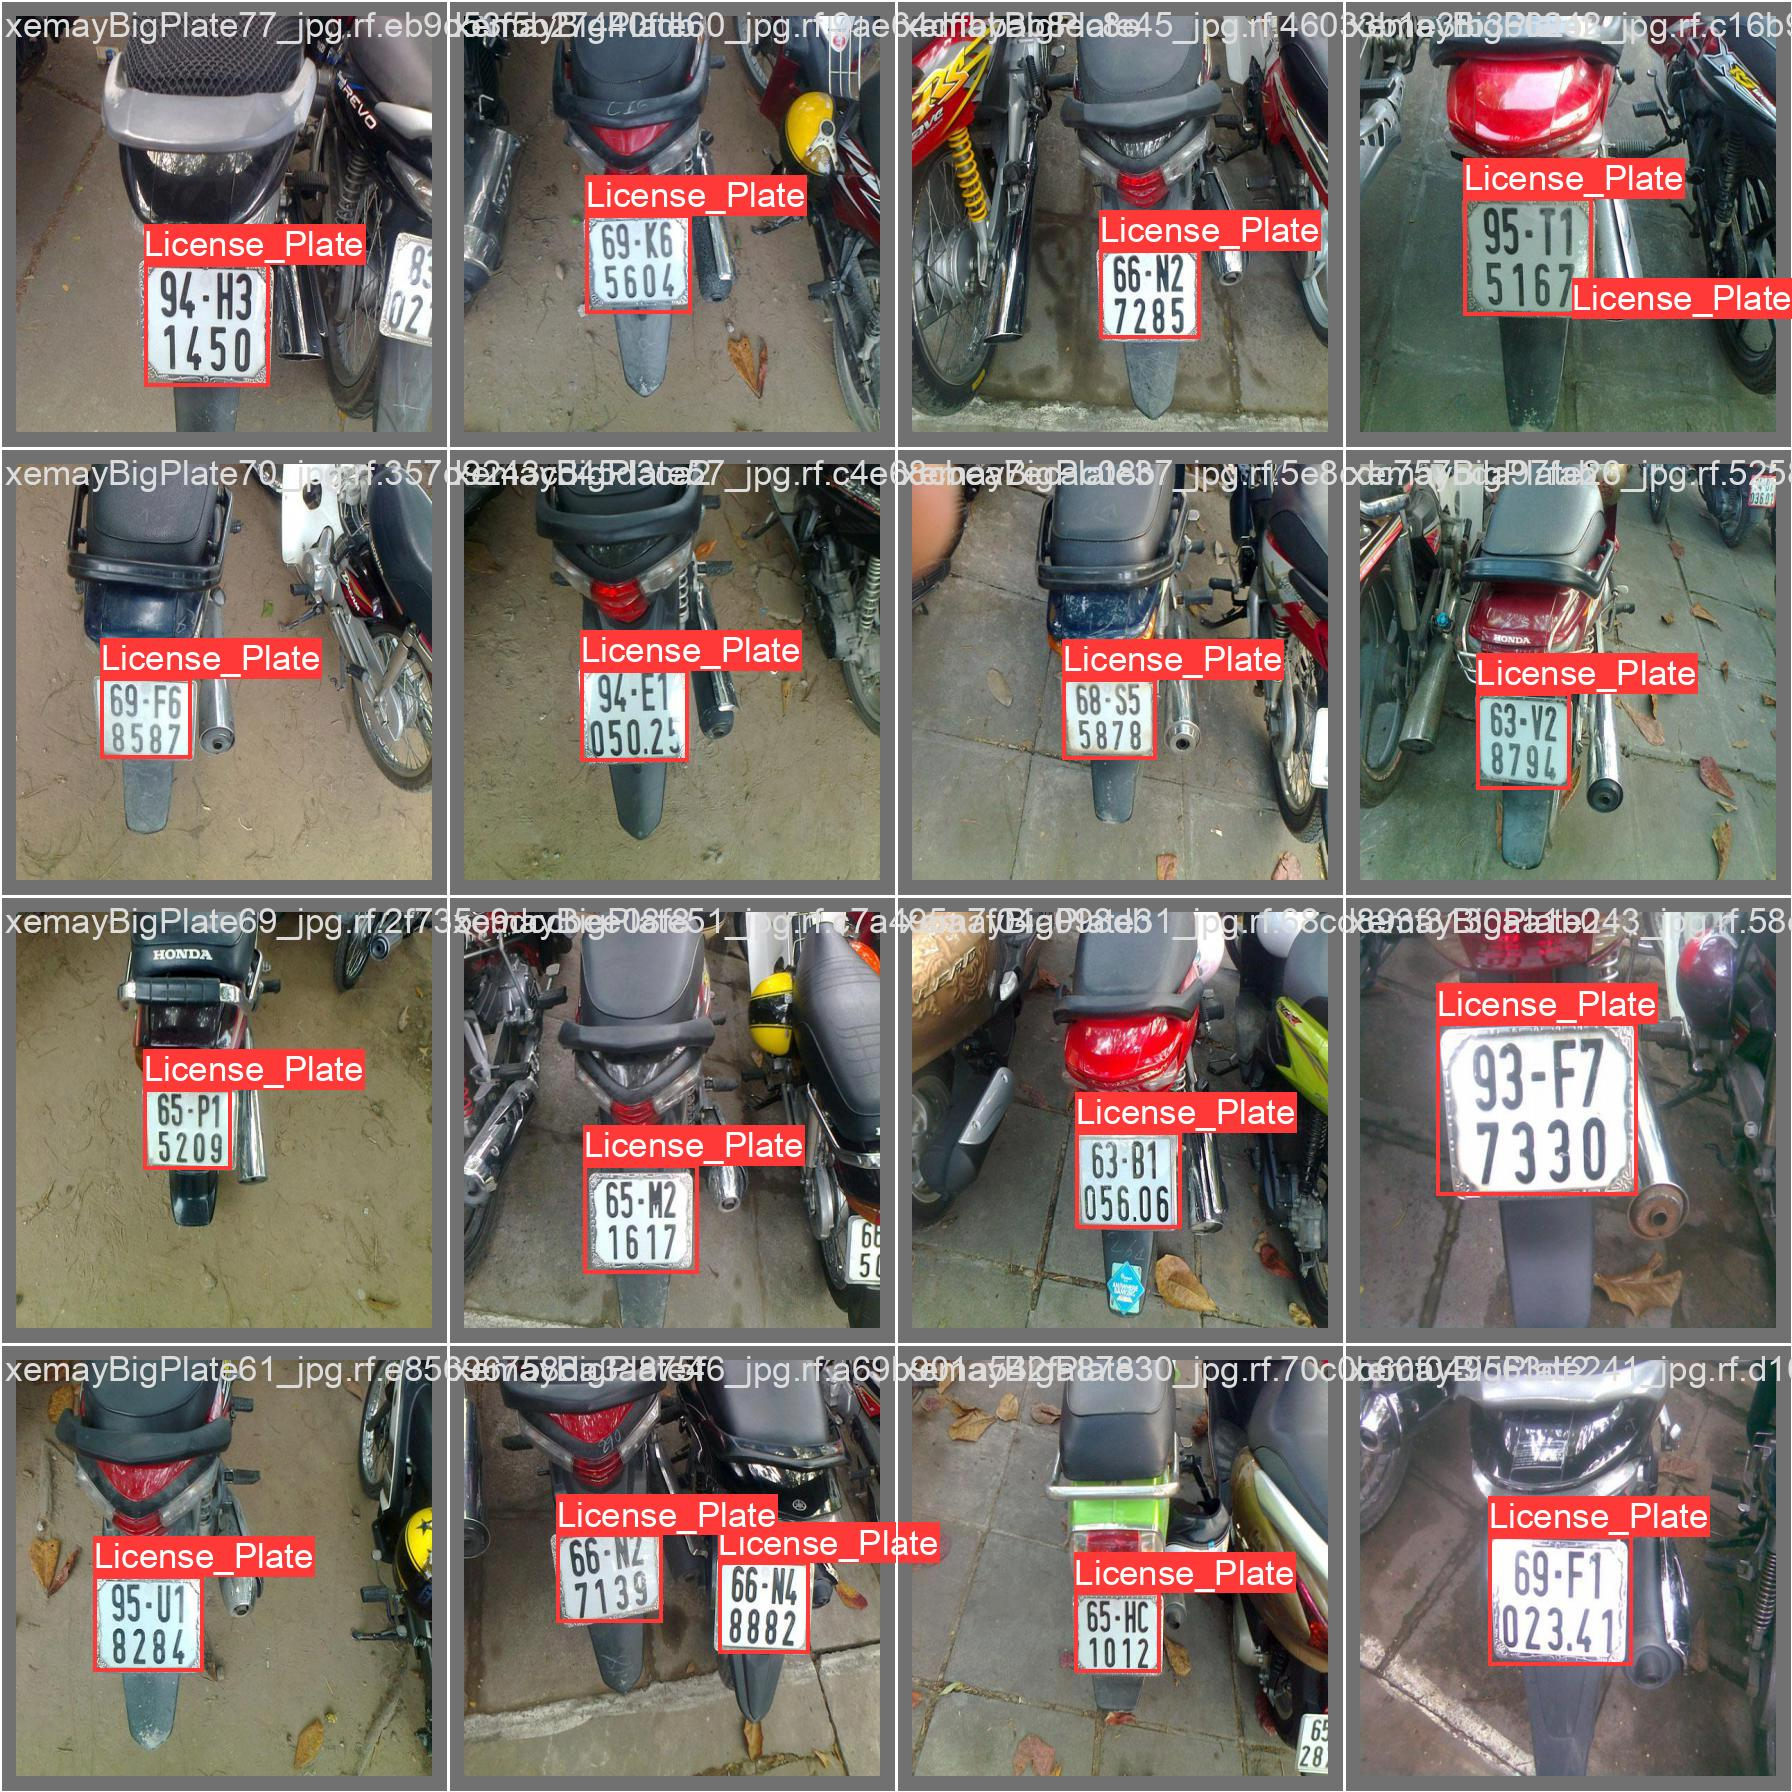

In [9]:
Image(filename=f'./runs/train/yolov5s_results{train_version}/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


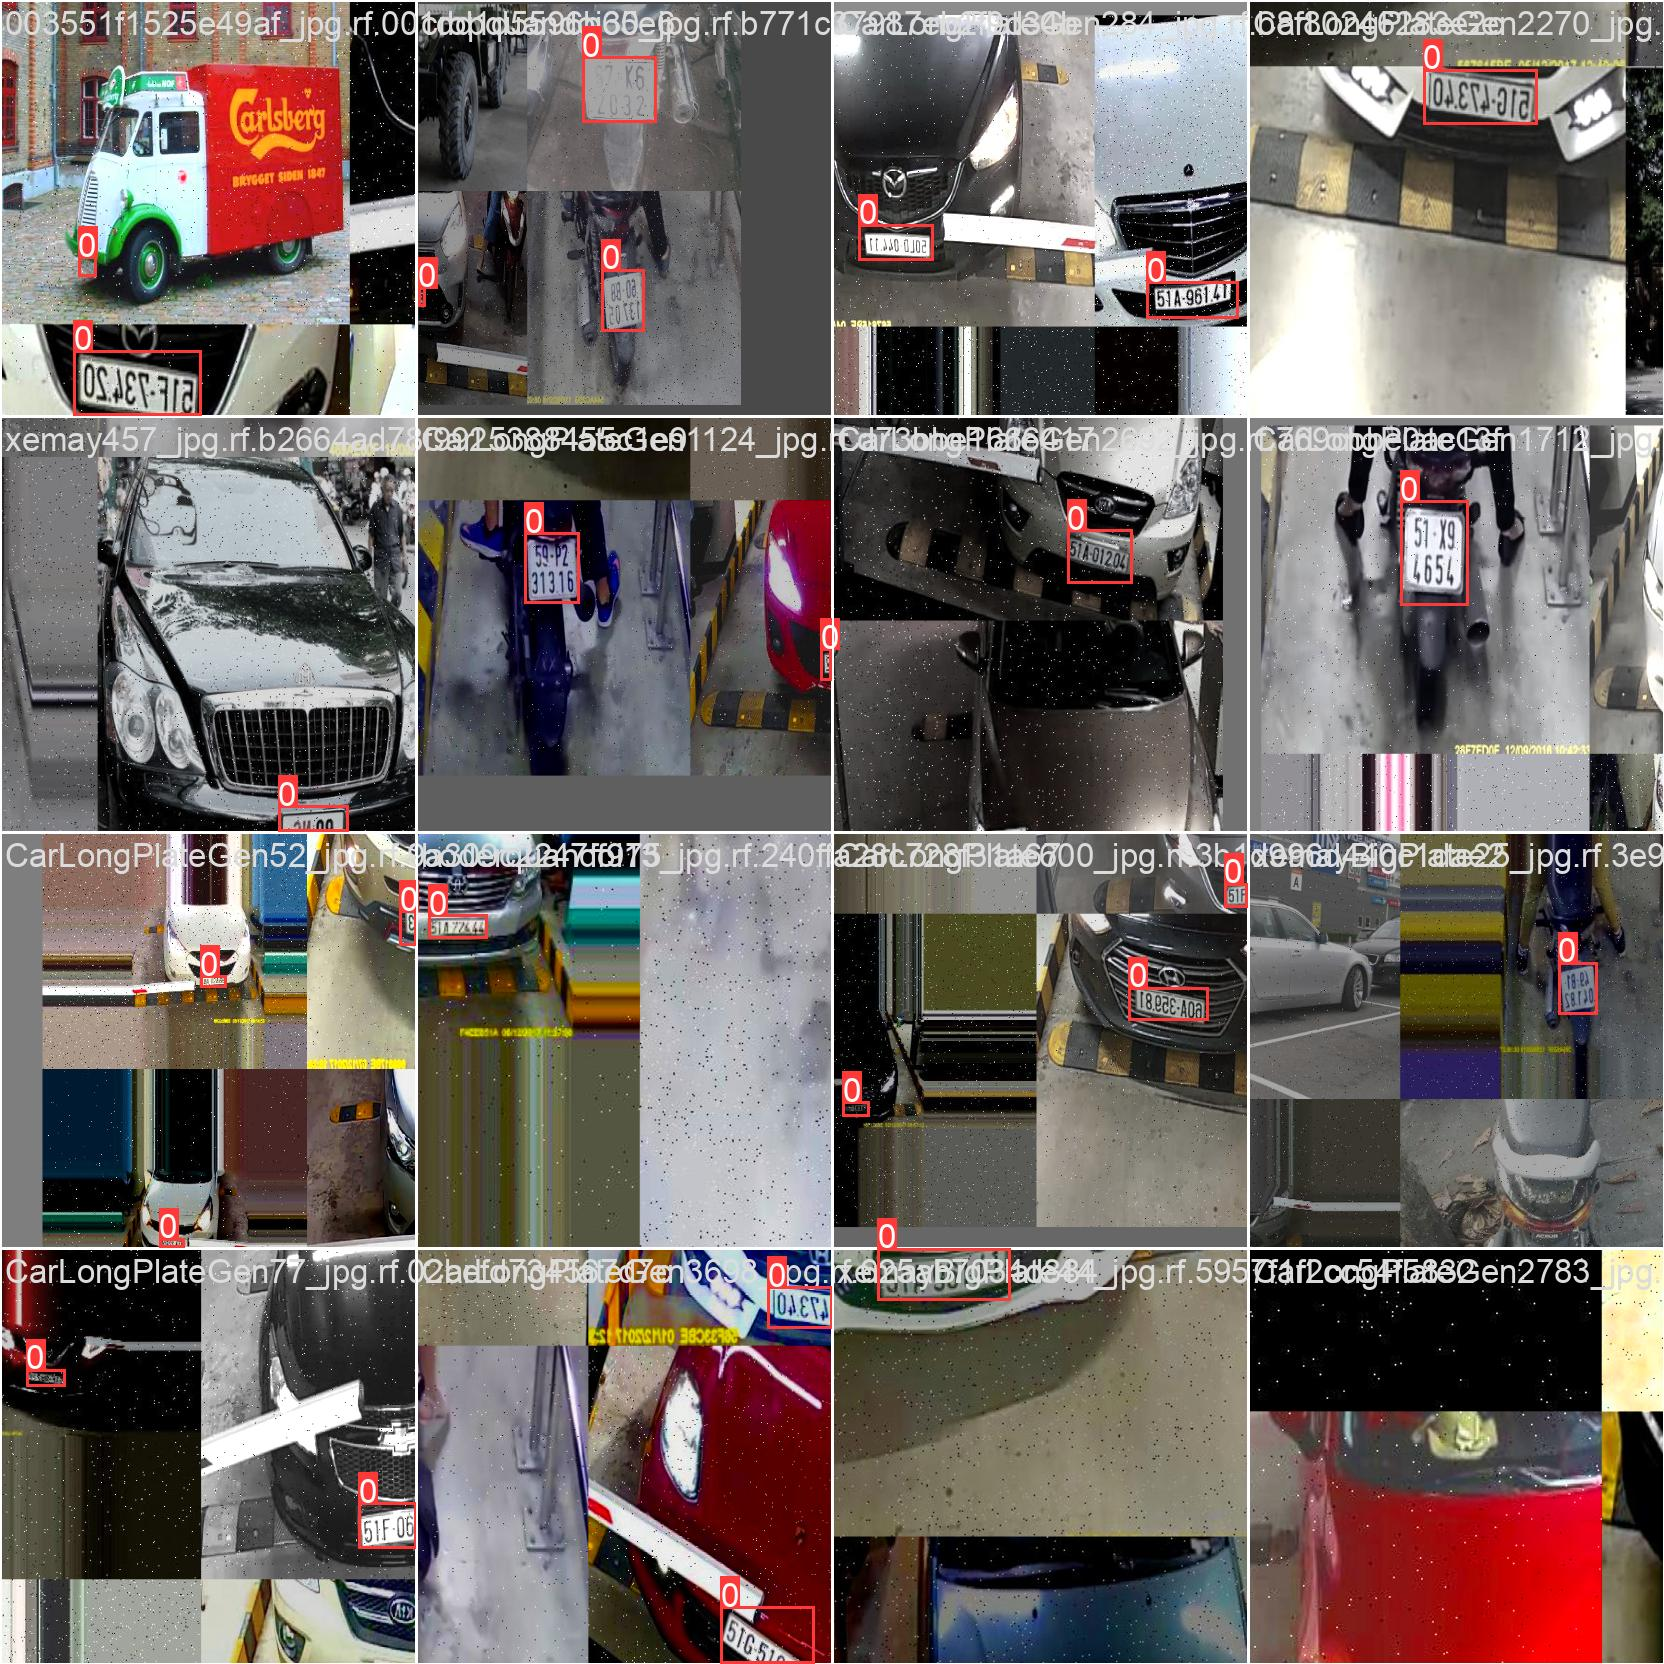

In [10]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename=f'./runs/train/yolov5s_results{train_version}/train_batch0.jpg', width=900)

In [11]:
!python detect.py --weights ./runs/train/yolov5s_results{train_version}/weights/best.pt --img 416 --conf 0.4 --source {dataset_location}/test/images

detect: weights=['./runs/train/yolov5s_results/weights/best.pt'], source=/home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-377-g24ee2801 Python-3.12.7 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5834MiB)

Fusing layers... 
YOLOv5s_custom summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/882 /home/roma/5sem/Real-time_Number_Plate_Recognition/data/roboflow_dataset/test/images/0002a5b67e5f0909_jpg.rf.ba5108898dfac55be495452b33fe9b9e.jpg: 416x416 2 License_Plates, 4.4ms
image 2/882 

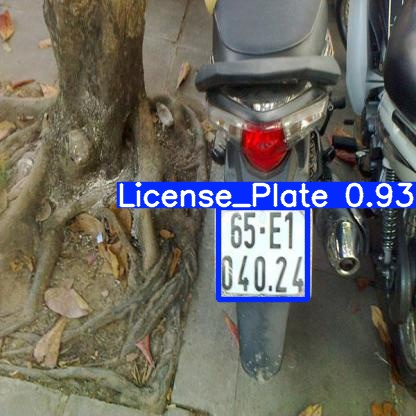

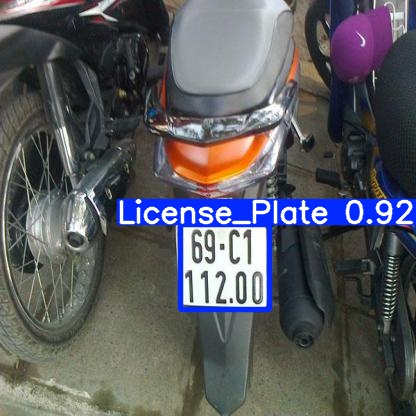

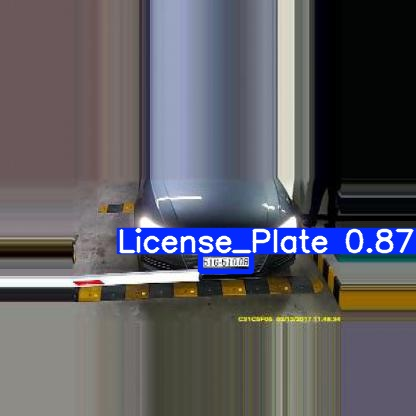

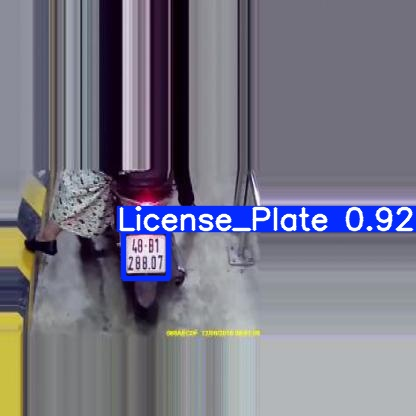

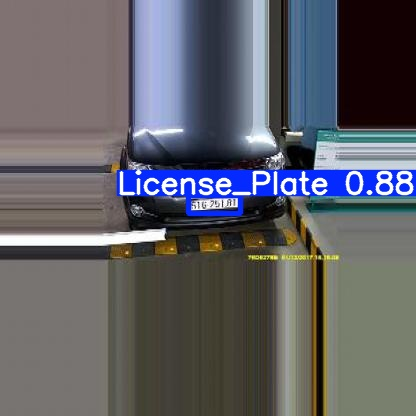

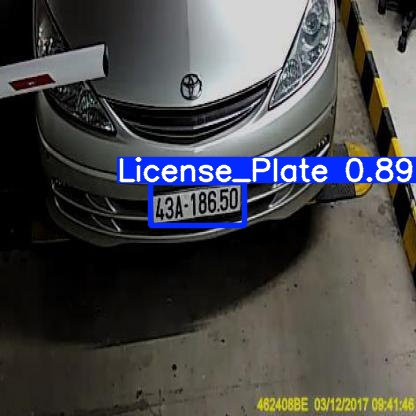

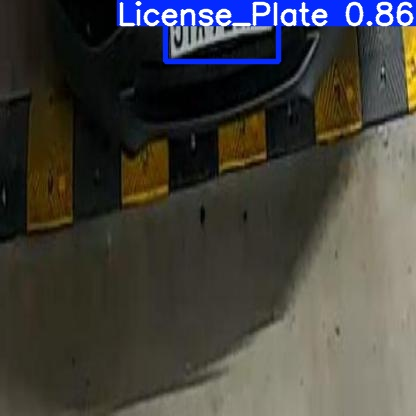

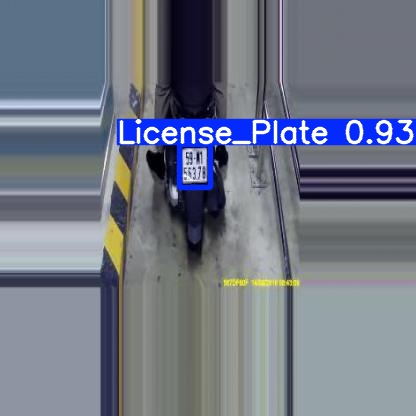

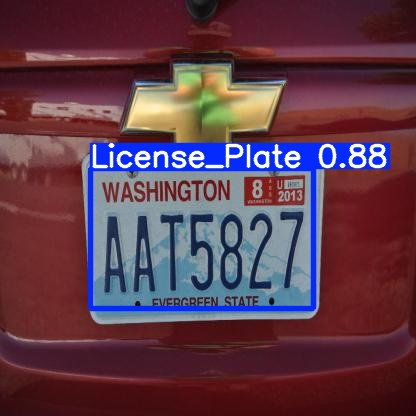

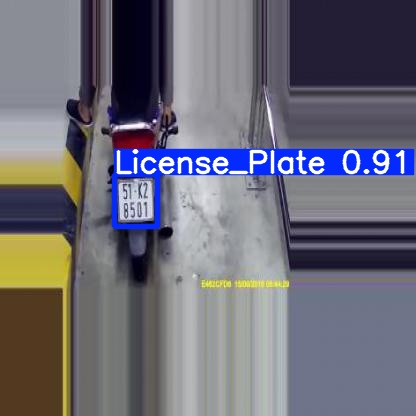

In [12]:
import glob
from IPython.display import Image, display
for imageName in glob.glob(f'./runs/detect/exp{train_version}/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))
     